In [1]:
import torch

print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

1
NVIDIA GeForce MX150


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [85]:
stock_tweets_data = pd.read_csv('stock_tweets.csv')
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')
sentiment_data = pd.read_csv('data_sentiment.csv')

In [86]:
stock_tweets_data.info()
stock_yfinance_data.info()
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80793 entries, 0 to 80792
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          80793 non-null  object
 1   Tweet         80793 non-null  object
 2   Stock Name    80793 non-null  object
 3   Company Name  80793 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        6300 non-null   object 
 1   Open        6300 non-null   float64
 2   High        6300 non-null   float64
 3   Low         6300 non-null   float64
 4   Close       6300 non-null   float64
 5   Adj Close   6300 non-null   float64
 6   Volume      6300 non-null   int64  
 7   Stock Name  6300 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 393.9+ KB
<class 'pandas.core.

In [87]:
stock_tweets_data.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [88]:
stock_tweets_data.rename(columns={'Date': 'date', 'Tweet': 'tweet' ,'Stock Name': 'stock_name', 'Company Name': 'company_name'}, inplace='True')

In [89]:
stock_tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80793 entries, 0 to 80792
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          80793 non-null  object
 1   tweet         80793 non-null  object
 2   stock_name    80793 non-null  object
 3   company_name  80793 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


In [90]:
stock_yfinance_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [91]:
stock_yfinance_data.rename(columns={'Date':'date', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close':'close', 'Adj Close': 'adj_close', 'Volume':'volume', 'Stock Name': 'stock_name'}, inplace=True)

<Axes: ylabel='close'>

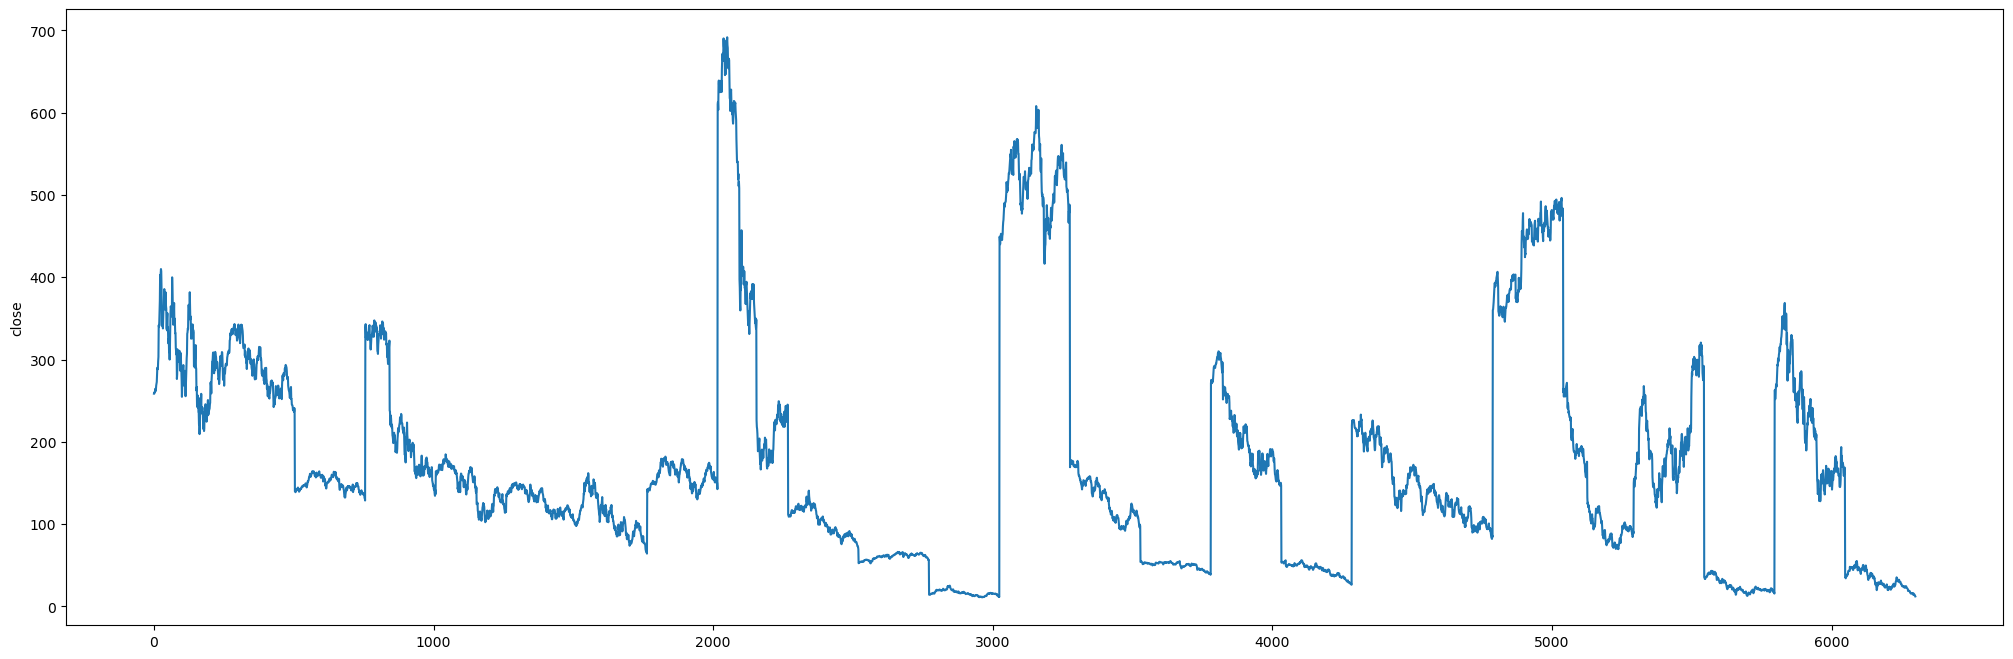

In [92]:
plt.figure(figsize=(25,8))
sns.lineplot(stock_yfinance_data.close)
#sns.lineplot(stock_yfinance_data.open)

In [93]:
sentiment_data.head()

,Date,Tweet,Stock Name,Company Name,positive,neutral,negative
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0573,0.2339,0.7088
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.3148,0.6753,0.0099
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.0785,0.8904,0.0311
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",0.0120,0.0724,0.9156
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",0.0052,0.0452,0.9497


In [94]:
sentiment_data.rename(columns={'Date': 'date', 'Tweet': 'tweet', 'Stock Name': 'stock_name', 'Company Name': 'company_name'}, inplace=True)

In [95]:
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80793 entries, 0 to 80792
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          80793 non-null  object 
 1   tweet         80793 non-null  object 
 2   stock_name    80793 non-null  object 
 3   company_name  80793 non-null  object 
 4   positive      80793 non-null  float64
 5   neutral       80793 non-null  float64
 6   negative      80793 non-null  float64
dtypes: float64(3), object(4)
memory usage: 4.3+ MB


In [96]:
sentiment_data.stock_name.unique()
#sentiment_data.company_name.unique()

array(['TSLA', 'MSFT', 'PG', 'META', 'AMZN', 'GOOG', 'AMD', 'AAPL',
       'NFLX', 'TSM', 'KO', 'F', 'COST', 'DIS', 'VZ', 'CRM', 'INTC', 'BA',
       'BX', 'NOC', 'PYPL', 'ENPH', 'NIO', 'ZS', 'XPEV'], dtype=object)

In [97]:
'''
# option 1 : cleanup tweets and overwrite the tweet column
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet
trump_df['tweet'] = trump_df['tweet'].map(lambda x: cleaner(x))
trump_df.to_csv('') #specify location



# option 2 : cleanup tweets and stores it as a list
clean_tweets = []
for tweet in trump_df['tweet']:
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    ##Here's where all the cleaning takes place
    clean_tweets.append(tweet)
trump_df['tweet'] = clean_tweets
trump_df.to_csv('') #Specify location
'''

'\n#cleanup tweets and overwrite the tweet column\ndef cleaner(tweet):\n    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign\n    tweet = re.sub(r"(?:\\@|http?\\://|https?\\://|www)\\S+", "", tweet) #Remove http links\n    tweet = " ".join(tweet.split())\n    tweet = \'\'.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis\n    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text\n    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)          if w.lower() in words or not w.isalpha())\n    return tweet\ntrump_df[\'tweet\'] = trump_df[\'tweet\'].map(lambda x: cleaner(x))\ntrump_df.to_csv(\'\') #specify location\n\n\n\n# cleanup tweets and stores it as a list\nclean_tweets = []\nfor tweet in trump_df[\'tweet\']:\n    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign\n    ##Here\'s where all the cleaning takes place\n    clean_tweets.append(tweet)\ntrump_df[\'tweet\'] = clean_tweets\ntrump_df.to_csv(\'\') #Specify l

In [98]:
df_verizon = stock_yfinance_data.loc[stock_yfinance_data['stock_name']=='VZ']
df_verizon

,date,open,high,low,close,adj_close,volume,stock_name
3528,2021-09-30,54.500000,54.509998,54.000000,54.009998,50.605930,18736600,VZ
3529,2021-10-01,54.020000,54.560001,53.919998,54.299999,50.877659,18618400,VZ
3530,2021-10-04,54.450001,54.849998,54.279999,54.500000,51.065052,18159200,VZ
3531,2021-10-05,54.639999,54.810001,54.320000,54.509998,51.074421,13218200,VZ
3532,2021-10-06,54.340000,54.590000,54.009998,54.529999,51.093163,21339800,VZ
...,...,...,...,...,...,...,...,...
3775,2022-09-23,39.560001,39.869999,39.110001,39.520000,38.865013,19439700,VZ
3776,2022-09-26,39.230000,39.380001,38.630001,38.930000,38.284790,21345700,VZ
3777,2022-09-27,39.200001,39.700001,38.779999,38.889999,38.245453,20357700,VZ
3778,2022-09-28,39.060001,39.509998,39.009998,39.389999,38.737164,20567400,VZ


<Axes: ylabel='open'>

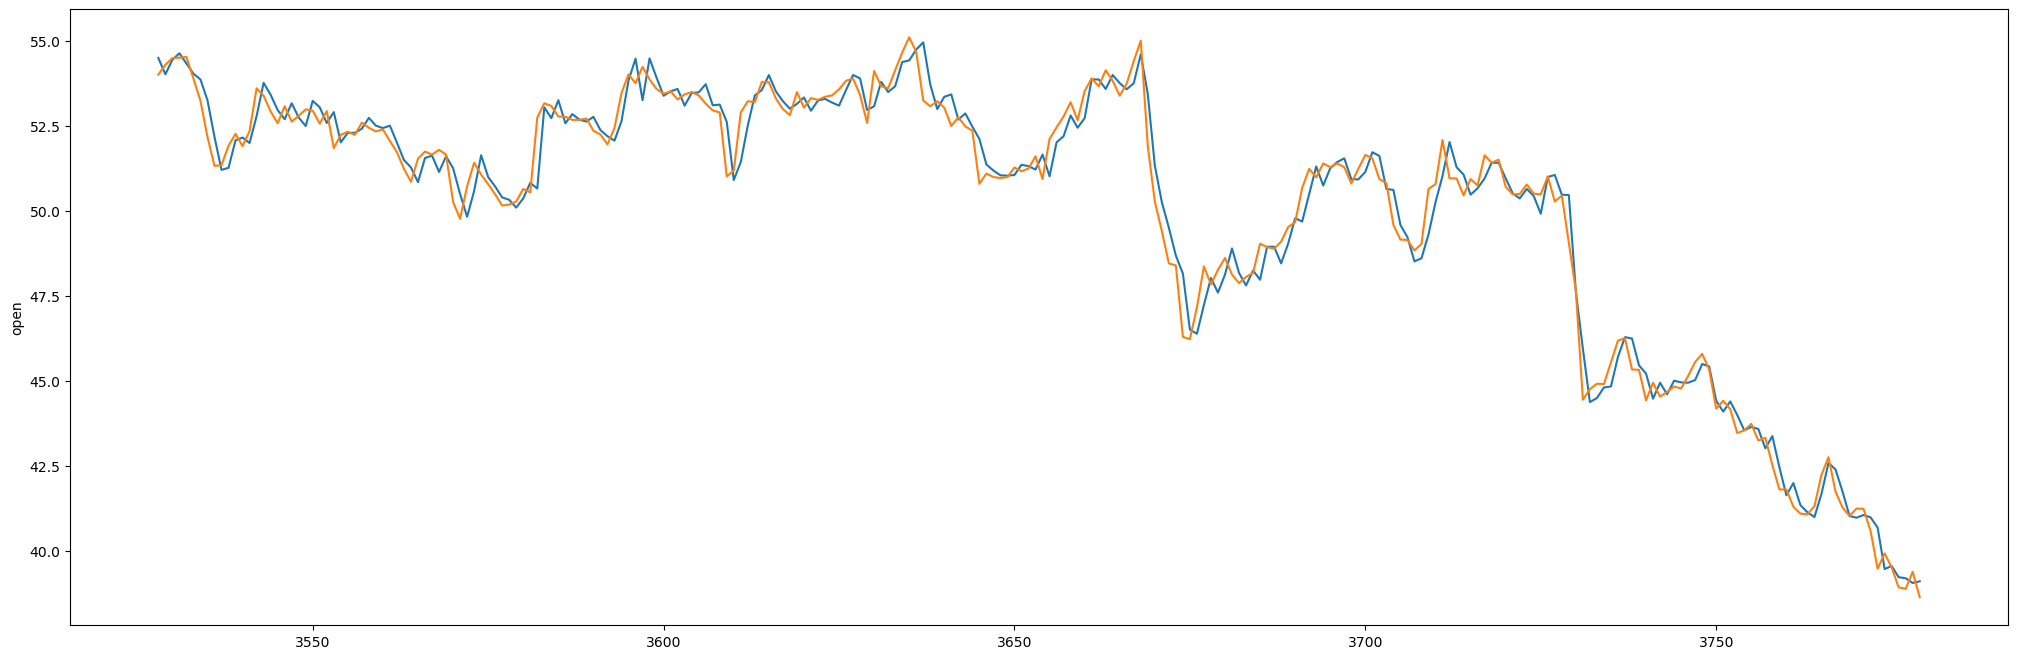

In [99]:
plt.figure(figsize=(25,8))
sns.lineplot(df_verizon.open)
sns.lineplot(df_verizon.close)

In [100]:
df_verizon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 3528 to 3779
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        252 non-null    object 
 1   open        252 non-null    float64
 2   high        252 non-null    float64
 3   low         252 non-null    float64
 4   close       252 non-null    float64
 5   adj_close   252 non-null    float64
 6   volume      252 non-null    int64  
 7   stock_name  252 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 17.7+ KB


In [101]:
verizon_closing_price = df_verizon['close'].values
print(type(verizon_closing_price))
print(type(verizon_closing_price[0]))
print(verizon_closing_price)


<class 'numpy.ndarray'>
<class 'numpy.float64'>
[54.00999832 54.29999924 54.5        54.50999832 54.52999878 53.90000153
 53.24000168 52.18000031 51.33000183 51.34999847 51.91999817 52.27000046
 51.90999985 52.34999847 53.61000061 53.38999939 52.93000031 52.58000183
 53.08000183 52.63000107 52.79999924 52.99000168 52.95000076 52.56999969
 52.93999863 51.84999847 52.24000168 52.33000183 52.24000168 52.59999847
 52.45000076 52.34000015 52.40000153 52.06000137 51.72999954 51.24000168
 50.86000061 51.54000092 51.75       51.65999985 51.79999924 51.65999985
 50.27000046 49.77000046 50.72999954 51.41999817 51.06999969 50.79000092
 50.49000168 50.15999985 50.18999863 50.27999878 50.65000153 50.54999924
 52.75       53.16999817 53.09000015 52.77999878 52.77000046 52.68000031
 52.68000031 52.72000122 52.36000061 52.25       51.95999908 52.43999863
 53.47000122 54.02000046 53.75999832 54.24000168 53.86999893 53.59000015
 53.45000076 53.52000046 53.27999878 53.43000031 53.5        53.40000153
 53

In [102]:
test_size_verizon = 63

train_data_verizon = verizon_closing_price[:-test_size_verizon]
test_data_verizon = verizon_closing_price[-test_size_verizon:]

print(train_data_verizon.shape)
print(test_data_verizon.shape)

(189,)
(63,)


In [103]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_verizon_normalized = scaler.fit_transform(train_data_verizon.reshape(-1,1))

train_data_verizon_normalized[:5]

array([[0.75225177],
       [0.81756728],
       [0.86261249],
       [0.86486437],
       [0.86936897]])

In [104]:
import torch
import torch.nn as nn

In [105]:
train_data_verizon_normalized = torch.FloatTensor(train_data_verizon_normalized).view(-1)
train_data_verizon_normalized.shape

torch.Size([189])

In [106]:
seq_length = 10

def create_input_sequences(input_data, seq_len):
    input_seq = []
    l = len(input_data)

    for i in range(l - seq_len):
        train_seq = input_data[i: i + seq_len]
        train_label = input_data[i + seq_len: i + seq_len + 1]
        input_seq.append((train_seq, train_label))

    return input_seq    

In [107]:
train_inout_seq = create_input_sequences(train_data_verizon_normalized, seq_length)

In [108]:
len(train_inout_seq)

179

In [109]:
train_inout_seq[:5]

[(tensor([0.7523, 0.8176, 0.8626, 0.8649, 0.8694, 0.7275, 0.5788, 0.3401, 0.1486,
          0.1532]),
  tensor([0.2815])),
 (tensor([0.8176, 0.8626, 0.8649, 0.8694, 0.7275, 0.5788, 0.3401, 0.1486, 0.1532,
          0.2815]),
  tensor([0.3604])),
 (tensor([0.8626, 0.8649, 0.8694, 0.7275, 0.5788, 0.3401, 0.1486, 0.1532, 0.2815,
          0.3604]),
  tensor([0.2793])),
 (tensor([0.8649, 0.8694, 0.7275, 0.5788, 0.3401, 0.1486, 0.1532, 0.2815, 0.3604,
          0.2793]),
  tensor([0.3784])),
 (tensor([0.8694, 0.7275, 0.5788, 0.3401, 0.1486, 0.1532, 0.2815, 0.3604, 0.2793,
          0.3784]),
  tensor([0.6622]))]

In [110]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
df_verizon['close'] = scaler.fit_transform(df_verizon['close'].values.reshape(-1,1))
df_verizon['close']

3528    0.866424
3529    0.901639
3530    0.925926
3531    0.927140
3532    0.929569
          ...   
3775   -0.893139
3776   -0.964784
3777   -0.969642
3778   -0.908925
3779   -1.000000
Name: close, Length: 252, dtype: float64

In [111]:
def create_train_test_data(data, seq_length):
  #convert series to numpy array
  data_as_matrix = data.to_numpy()
  # list to hold all possible sequence lengths from givven data
  data_as_seq_len = []

  for i in range(len(data_as_matrix) - seq_length):
    data_as_seq_len.append(data_as_matrix[i: i + seq_length])
  
  data_as_seq_len = np.array(data_as_seq_len)
  test_size = int(np.round(0.2 * data_as_seq_len.shape[0]))
  train_size = data_as_seq_len.shape[0] - test_size

  x_train = data_as_seq_len[:train_size, :-1]
  y_train = data_as_seq_len[:train_size, -1]

  x_test = data_as_seq_len[train_size:, :-1]
  y_test = data_as_seq_len[train_size:, -1]

  return [x_train, y_train, x_test, y_test]

seq_len = 11
x_train, y_train, x_test, y_test = create_train_test_data(df_verizon['close'], seq_len)

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (193, 10)
y_train.shape =  (193,)
x_test.shape =  (48, 10)
y_test.shape =  (48,)


In [112]:
x_train[0]

array([0.86642353, 0.90163918, 0.92592586, 0.92713998, 0.9295687 ,
       0.8530663 , 0.77292061, 0.64420157, 0.54098379, 0.54341204])

In [113]:
y_train[0]

0.6126287547087301

In [114]:
x_train[1]

array([0.90163918, 0.92592586, 0.92713998, 0.9295687 , 0.8530663 ,
       0.77292061, 0.64420157, 0.54098379, 0.54341204, 0.61262875])

In [115]:
x_train = x_train[:,:, np.newaxis]
y_train = y_train[:, np.newaxis]
x_test = x_test[:,:, np.newaxis]
y_test = y_test[:, np.newaxis]

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (193, 10, 1)
y_train.shape =  (193, 1)
x_test.shape =  (48, 10, 1)
y_test.shape =  (48, 1)


In [116]:
# make training and test sets in torch

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [117]:
y_train.size(),x_train.size()

(torch.Size([193, 1]), torch.Size([193, 10, 1]))

Model

In [118]:

class LSTM(nn.Module):
  def __init__(self, input_size, output_size, hidden_dim, num_layers):
    super(LSTM, self).__init__()

    self.hidden_dim = hidden_dim
    self.num_layers = num_layers

    self.lstm = nn.LSTM(input_size, hidden_dim, num_layers, batch_first = True)
    self.fc = nn.Linear(hidden_dim, output_size)

  def forward(self, x):
    # x (batch_size, seq_length, input_size)
    # hidden (n_layers, batch_size, hidden_dim)
    # r_out (batch_size, time_step, hidden_size)

    batch_size = x.size(0)

    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
    c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

    out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

    # shape output to be (batch_size*seq_length, hidden_dim)
    # out = out.view(-1, self.hidden_dim)
    # last time-step(seq_len) hidden states
    out = self.fc(out[:, -1, :]) 

    return out

In [119]:
input_dim = 1
hidden_dim = 32
num_layers = 2 
output_dim = 1

In [120]:
model = LSTM(input_size= input_dim, output_size= output_dim, hidden_dim=  hidden_dim, num_layers= 2)
criterion = torch.nn.MSELoss(size_average= True)
optimizer =  torch.optim.Adam(model.parameters(), lr= 0.01)


print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
  print(list(model.parameters())[i].size())

LSTM(
  (lstm): LSTM(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
10
torch.Size([128, 1])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([1, 32])
torch.Size([1])


Train

In [121]:
loss_history = []
output_model = []
num_epochs = 100

for i in range(num_epochs):

  output_from_model = model(x_train)
  output_model.append(output_from_model)

  loss = criterion(output_from_model, y_train)
  if i % 3 == 0 and i!= 0:
    print("Epoch: ", i+1, "MSE Loss: ", loss.item())
  loss_history.append(loss.item())

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

Epoch:  4 MSE Loss:  0.07252012938261032
Epoch:  7 MSE Loss:  0.04503583535552025
Epoch:  10 MSE Loss:  0.048843126744031906
Epoch:  13 MSE Loss:  0.039801985025405884
Epoch:  16 MSE Loss:  0.04265664517879486
Epoch:  19 MSE Loss:  0.03691416233778
Epoch:  22 MSE Loss:  0.03781118616461754
Epoch:  25 MSE Loss:  0.0325569286942482
Epoch:  28 MSE Loss:  0.031300488859415054
Epoch:  31 MSE Loss:  0.025300992652773857
Epoch:  34 MSE Loss:  0.020214658230543137
Epoch:  37 MSE Loss:  0.01781841740012169
Epoch:  40 MSE Loss:  0.0191129669547081
Epoch:  43 MSE Loss:  0.016168508678674698
Epoch:  46 MSE Loss:  0.014910046011209488
Epoch:  49 MSE Loss:  0.01413699146360159
Epoch:  52 MSE Loss:  0.013043785467743874
Epoch:  55 MSE Loss:  0.011907362379133701
Epoch:  58 MSE Loss:  0.011015728116035461
Epoch:  61 MSE Loss:  0.010441898368299007
Epoch:  64 MSE Loss:  0.010132533498108387
Epoch:  67 MSE Loss:  0.009704213589429855


Epoch:  70 MSE Loss:  0.00925762951374054
Epoch:  73 MSE Loss:  0.008925655856728554
Epoch:  76 MSE Loss:  0.00858631543815136
Epoch:  79 MSE Loss:  0.008248229511082172
Epoch:  82 MSE Loss:  0.007945089600980282
Epoch:  85 MSE Loss:  0.007676380220800638
Epoch:  88 MSE Loss:  0.007419790141284466
Epoch:  91 MSE Loss:  0.007163987960666418
Epoch:  94 MSE Loss:  0.0069283959455788136
Epoch:  97 MSE Loss:  0.006717925425618887
Epoch:  100 MSE Loss:  0.006510696839541197


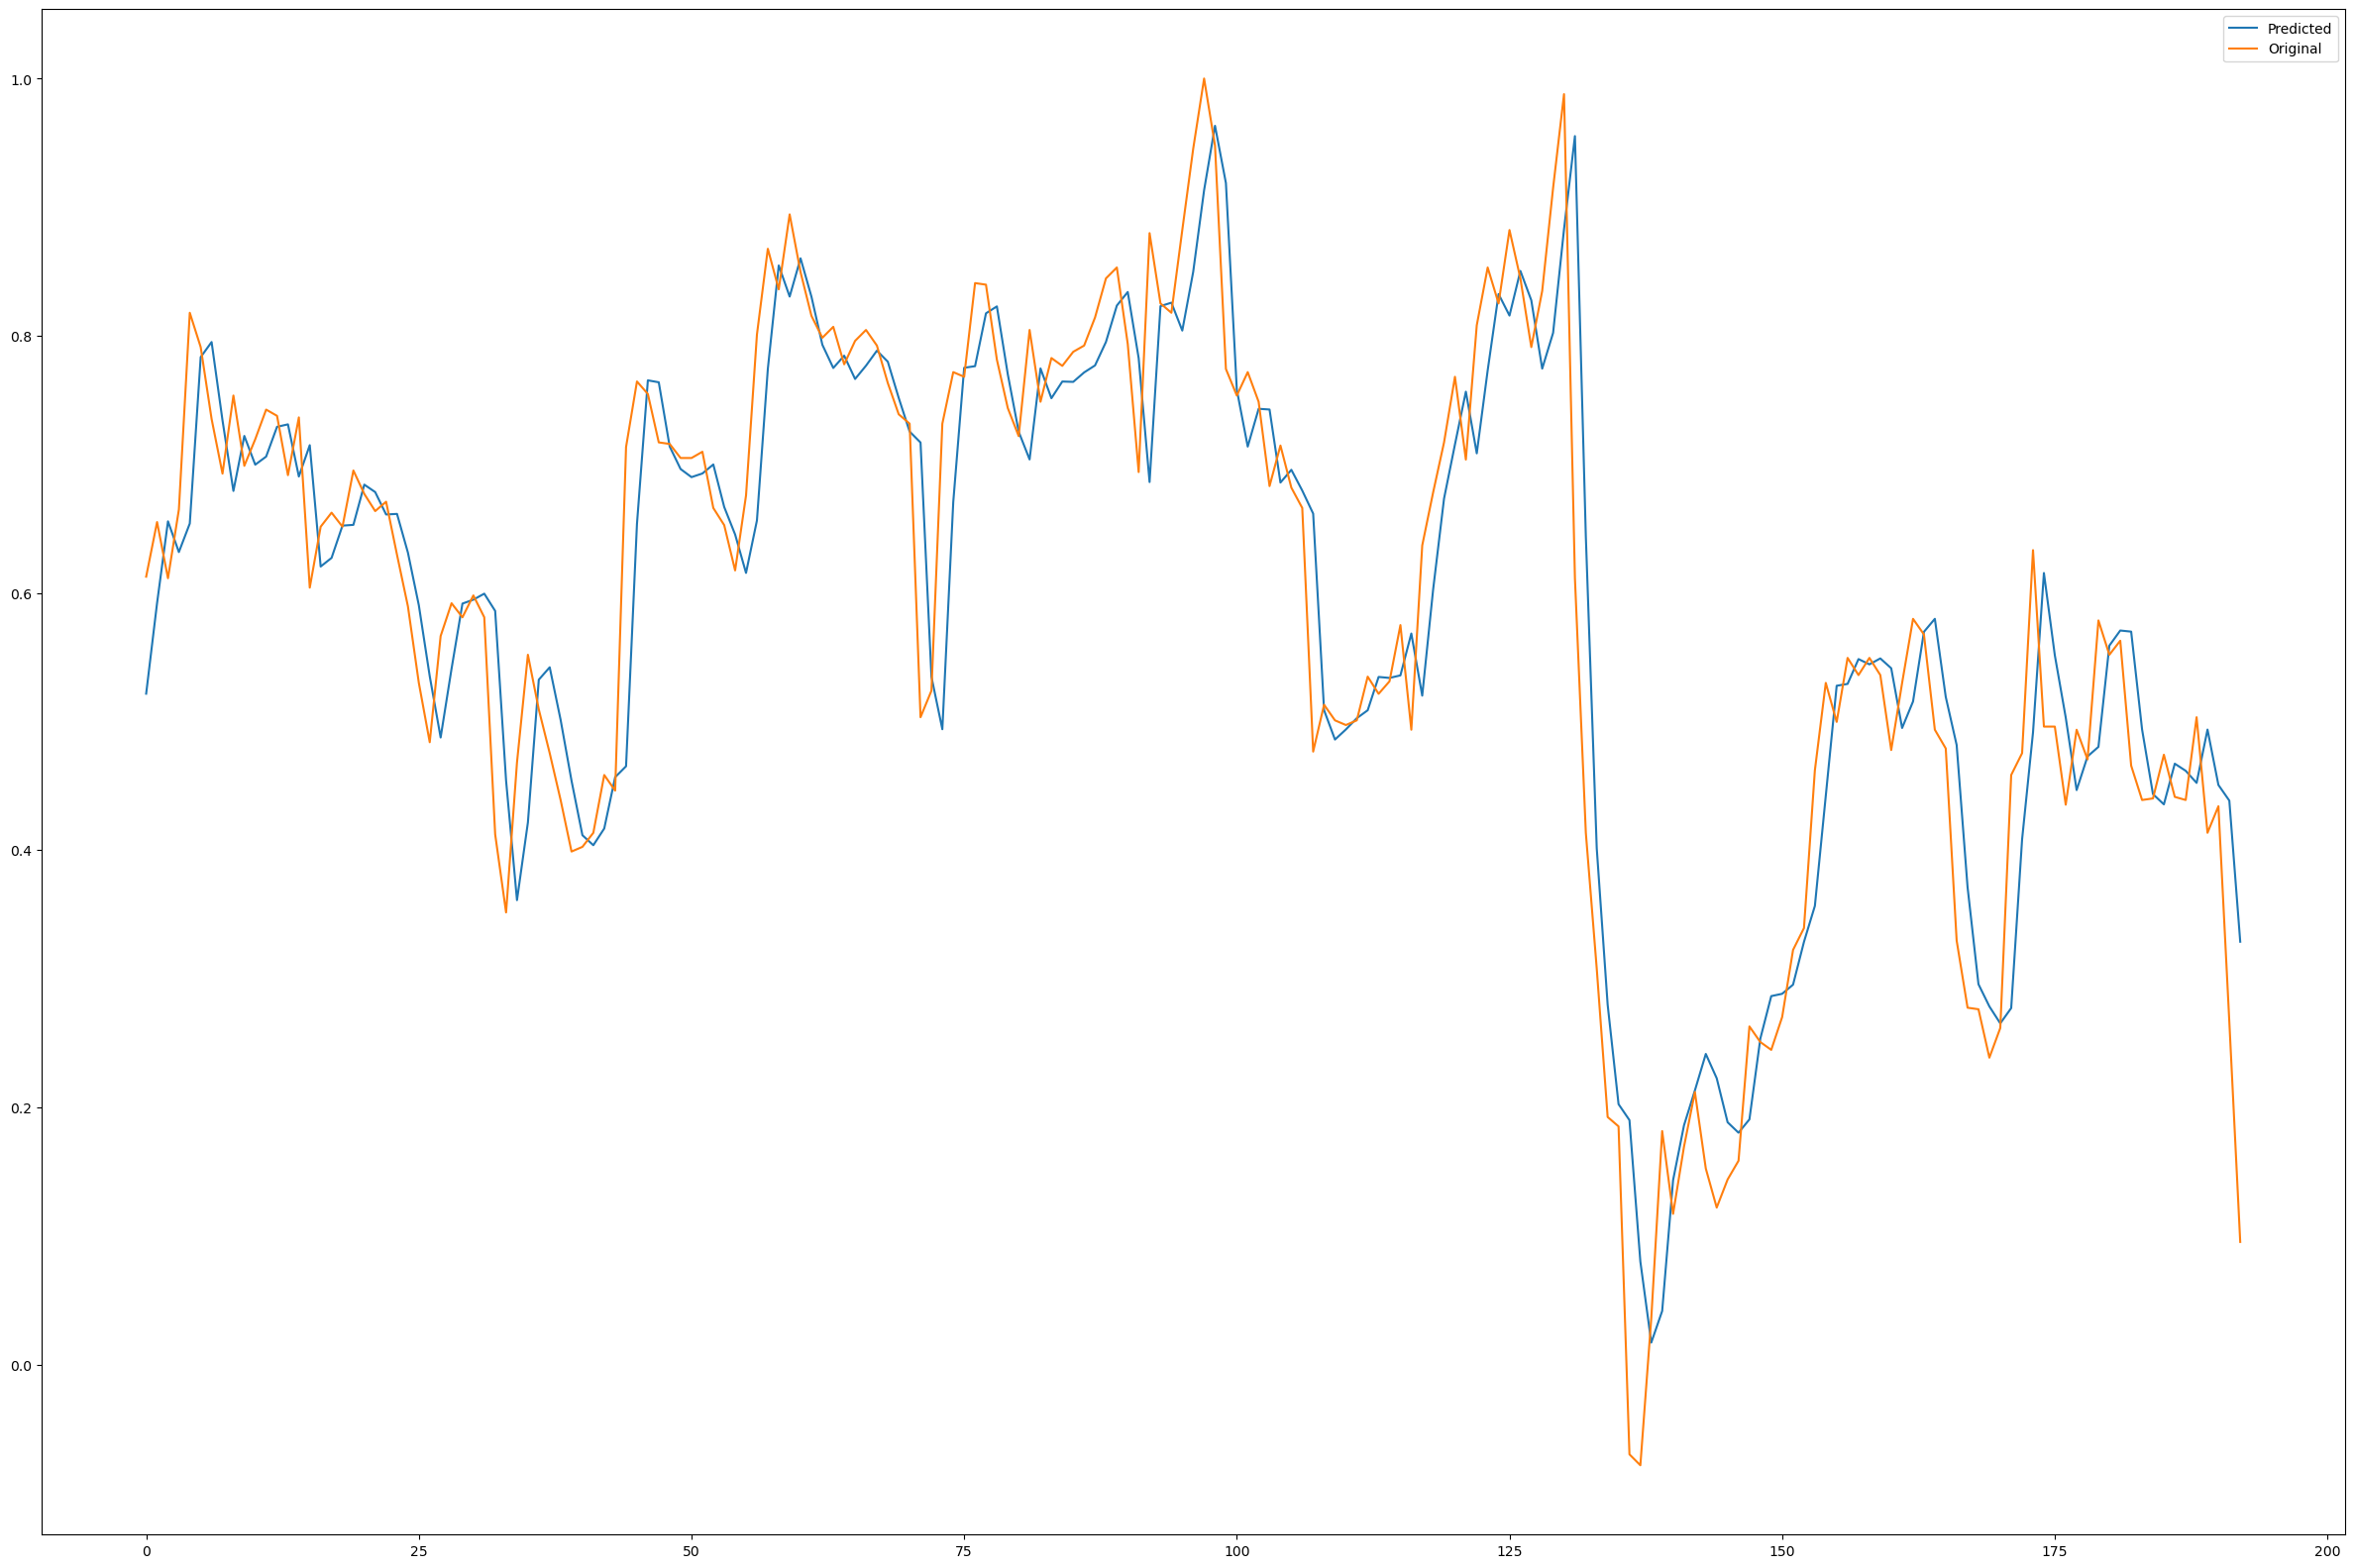

In [122]:
plt.figure(figsize=(30,20))
plt.plot(output_from_model.detach().numpy(), label="Predicted")
plt.plot(y_train.detach().numpy(), label="Original")
plt.legend()
plt.show()

In [123]:
output_from_model.detach().numpy().shape

(193, 1)

In [124]:
x =  output_from_model.view(-1)
for i in range(193):
  print(x[i].item())

0.5216440558433533
0.5921016931533813
0.6556872129440308
0.6317718029022217
0.6539745330810547
0.783369779586792
0.7951046228408813
0.7341680526733398
0.6792830228805542
0.7220895290374756
0.699730634689331
0.7060142755508423
0.7291717529296875
0.7310886383056641
0.6905295848846436
0.7149078845977783
0.6205317974090576
0.6272486448287964
0.6523369550704956
0.6529271602630615
0.6842118501663208
0.6784238815307617
0.661004900932312
0.6614490747451782
0.6313272714614868
0.5904382467269897
0.5352482795715332
0.48759350180625916
0.5410134792327881
0.5917114019393921
0.5947443246841431
0.5994293093681335
0.5859991312026978
0.45405662059783936
0.36112087965011597
0.4214913249015808
0.5325440168380737
0.5421949625015259
0.5013493299484253
0.4540043771266937
0.41159793734550476
0.40382495522499084
0.41682395339012146
0.4567315876483917
0.46523258090019226
0.6535863876342773
0.7653083801269531
0.7637940645217896
0.7138718366622925
0.6963440179824829
0.6900404691696167
0.6928822994232178
0.699885

In [125]:
x.shape

torch.Size([193])

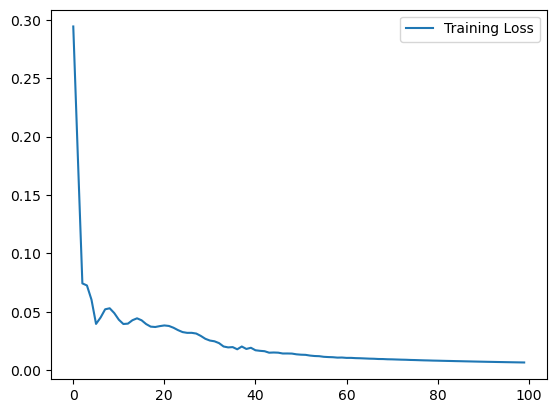

In [126]:
plt.plot(np.asarray(loss_history), label="Training Loss")
plt.legend()
plt.show()

In [127]:
x = np.random.randint(25, size=(3,4,5))
x

array([[[14,  3,  8, 23, 15],
        [ 8,  5, 11, 10, 14],
        [10, 21, 21, 18, 20],
        [24,  8, 17, 22, 14]],

       [[17,  3,  9,  4,  3],
        [18, 10, 12, 13,  6],
        [ 5, 10, 18, 15,  6],
        [15, 18,  7, 18, 24]],

       [[15, 24, 11, 20, 22],
        [ 0, 14,  6, 18,  2],
        [11,  3, 17,  3, 23],
        [10,  6, 14, 14, 17]]])

In [128]:
x[:,-1,:]

array([[24,  8, 17, 22, 14],
       [15, 18,  7, 18, 24],
       [10,  6, 14, 14, 17]])

In [129]:
# predictions on test dataset
y_test_pred = model(x_test)

# change the predictions back to original dataset
y_train_pred = scaler.inverse_transform(output_from_model.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

In [130]:

from math import sqrt
from sklearn.metrics import mean_squared_error

#calculate rmse
train_rmse = sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print("Train rmse: ", train_rmse)
test_rmse = sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print("Test rmse: ", test_rmse)

Train rmse:  0.664472946777352
Test rmse:  2.8627975908867045


In [131]:
y_test_pred[-5:]

array([[44.45666 ],
       [44.368027],
       [44.297188],
       [44.23686 ],
       [44.179733]], dtype=float32)

In [132]:
y_test[-5:]

array([[39.93    ],
       [39.52    ],
       [38.93    ],
       [38.889996],
       [39.39    ]], dtype=float32)

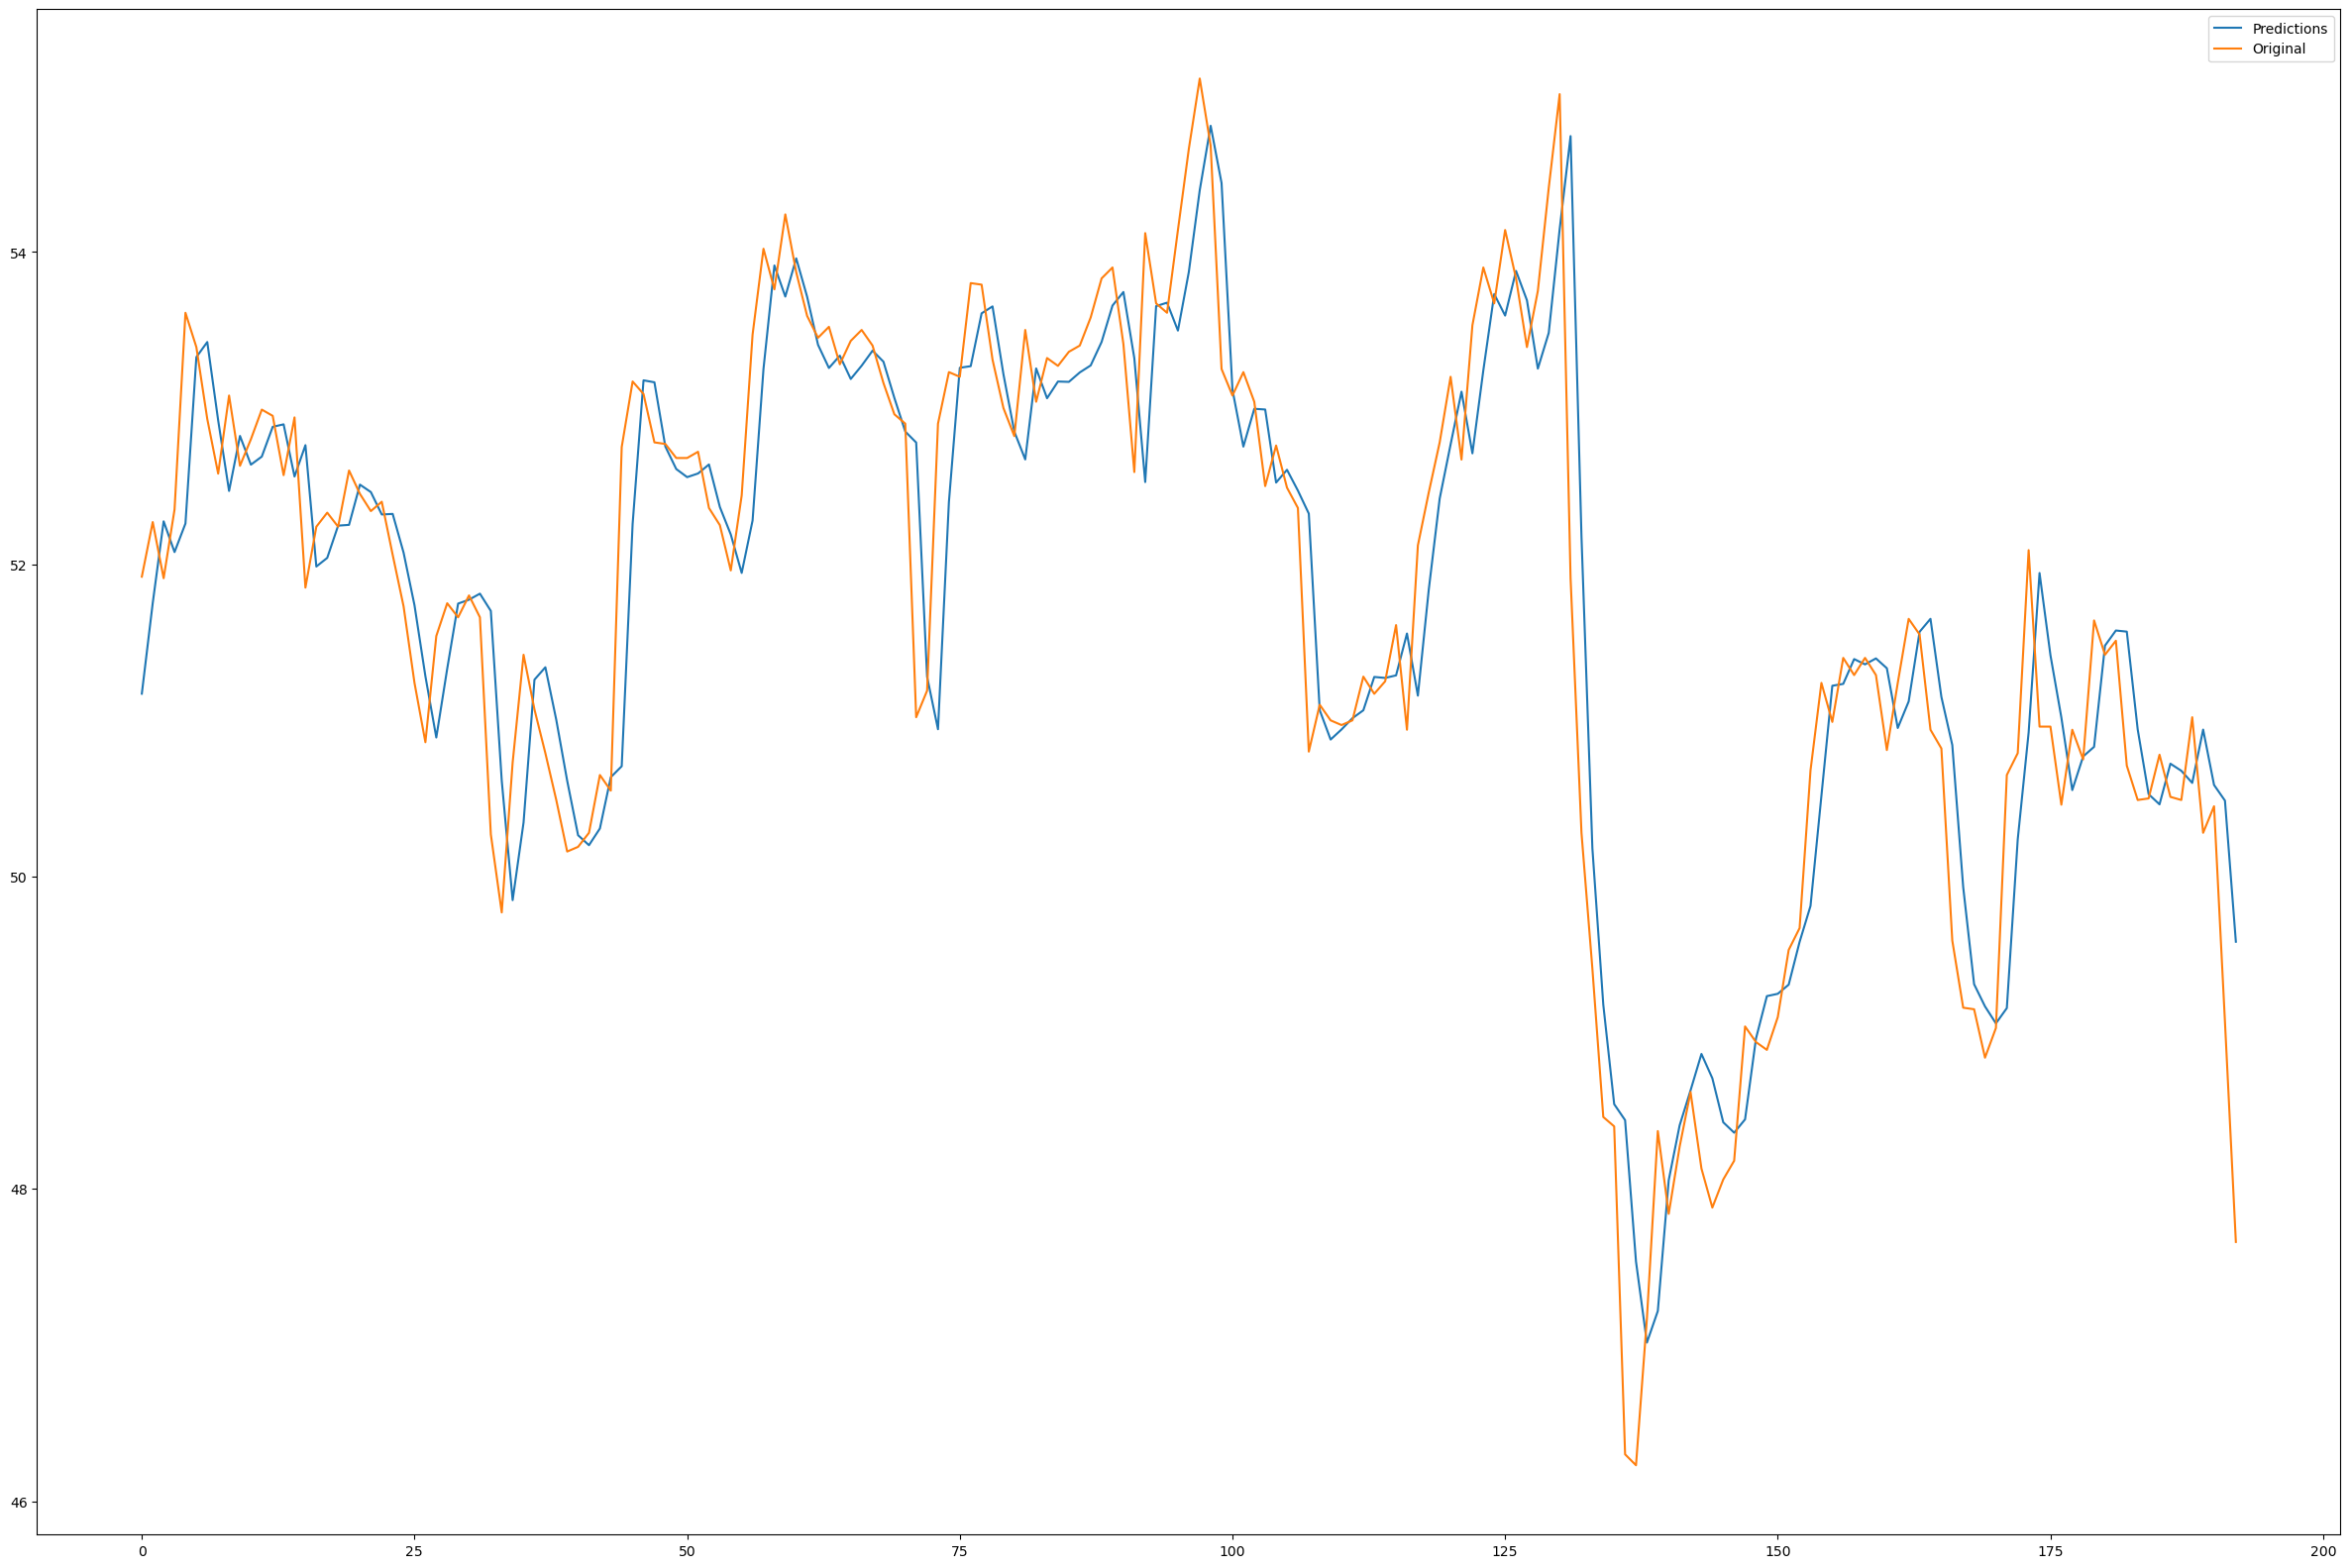

In [133]:
plt.figure(figsize=(30,20))
plt.plot(y_train_pred, label="Predictions")
plt.plot(y_train, label="Original")
plt.legend()
plt.show()

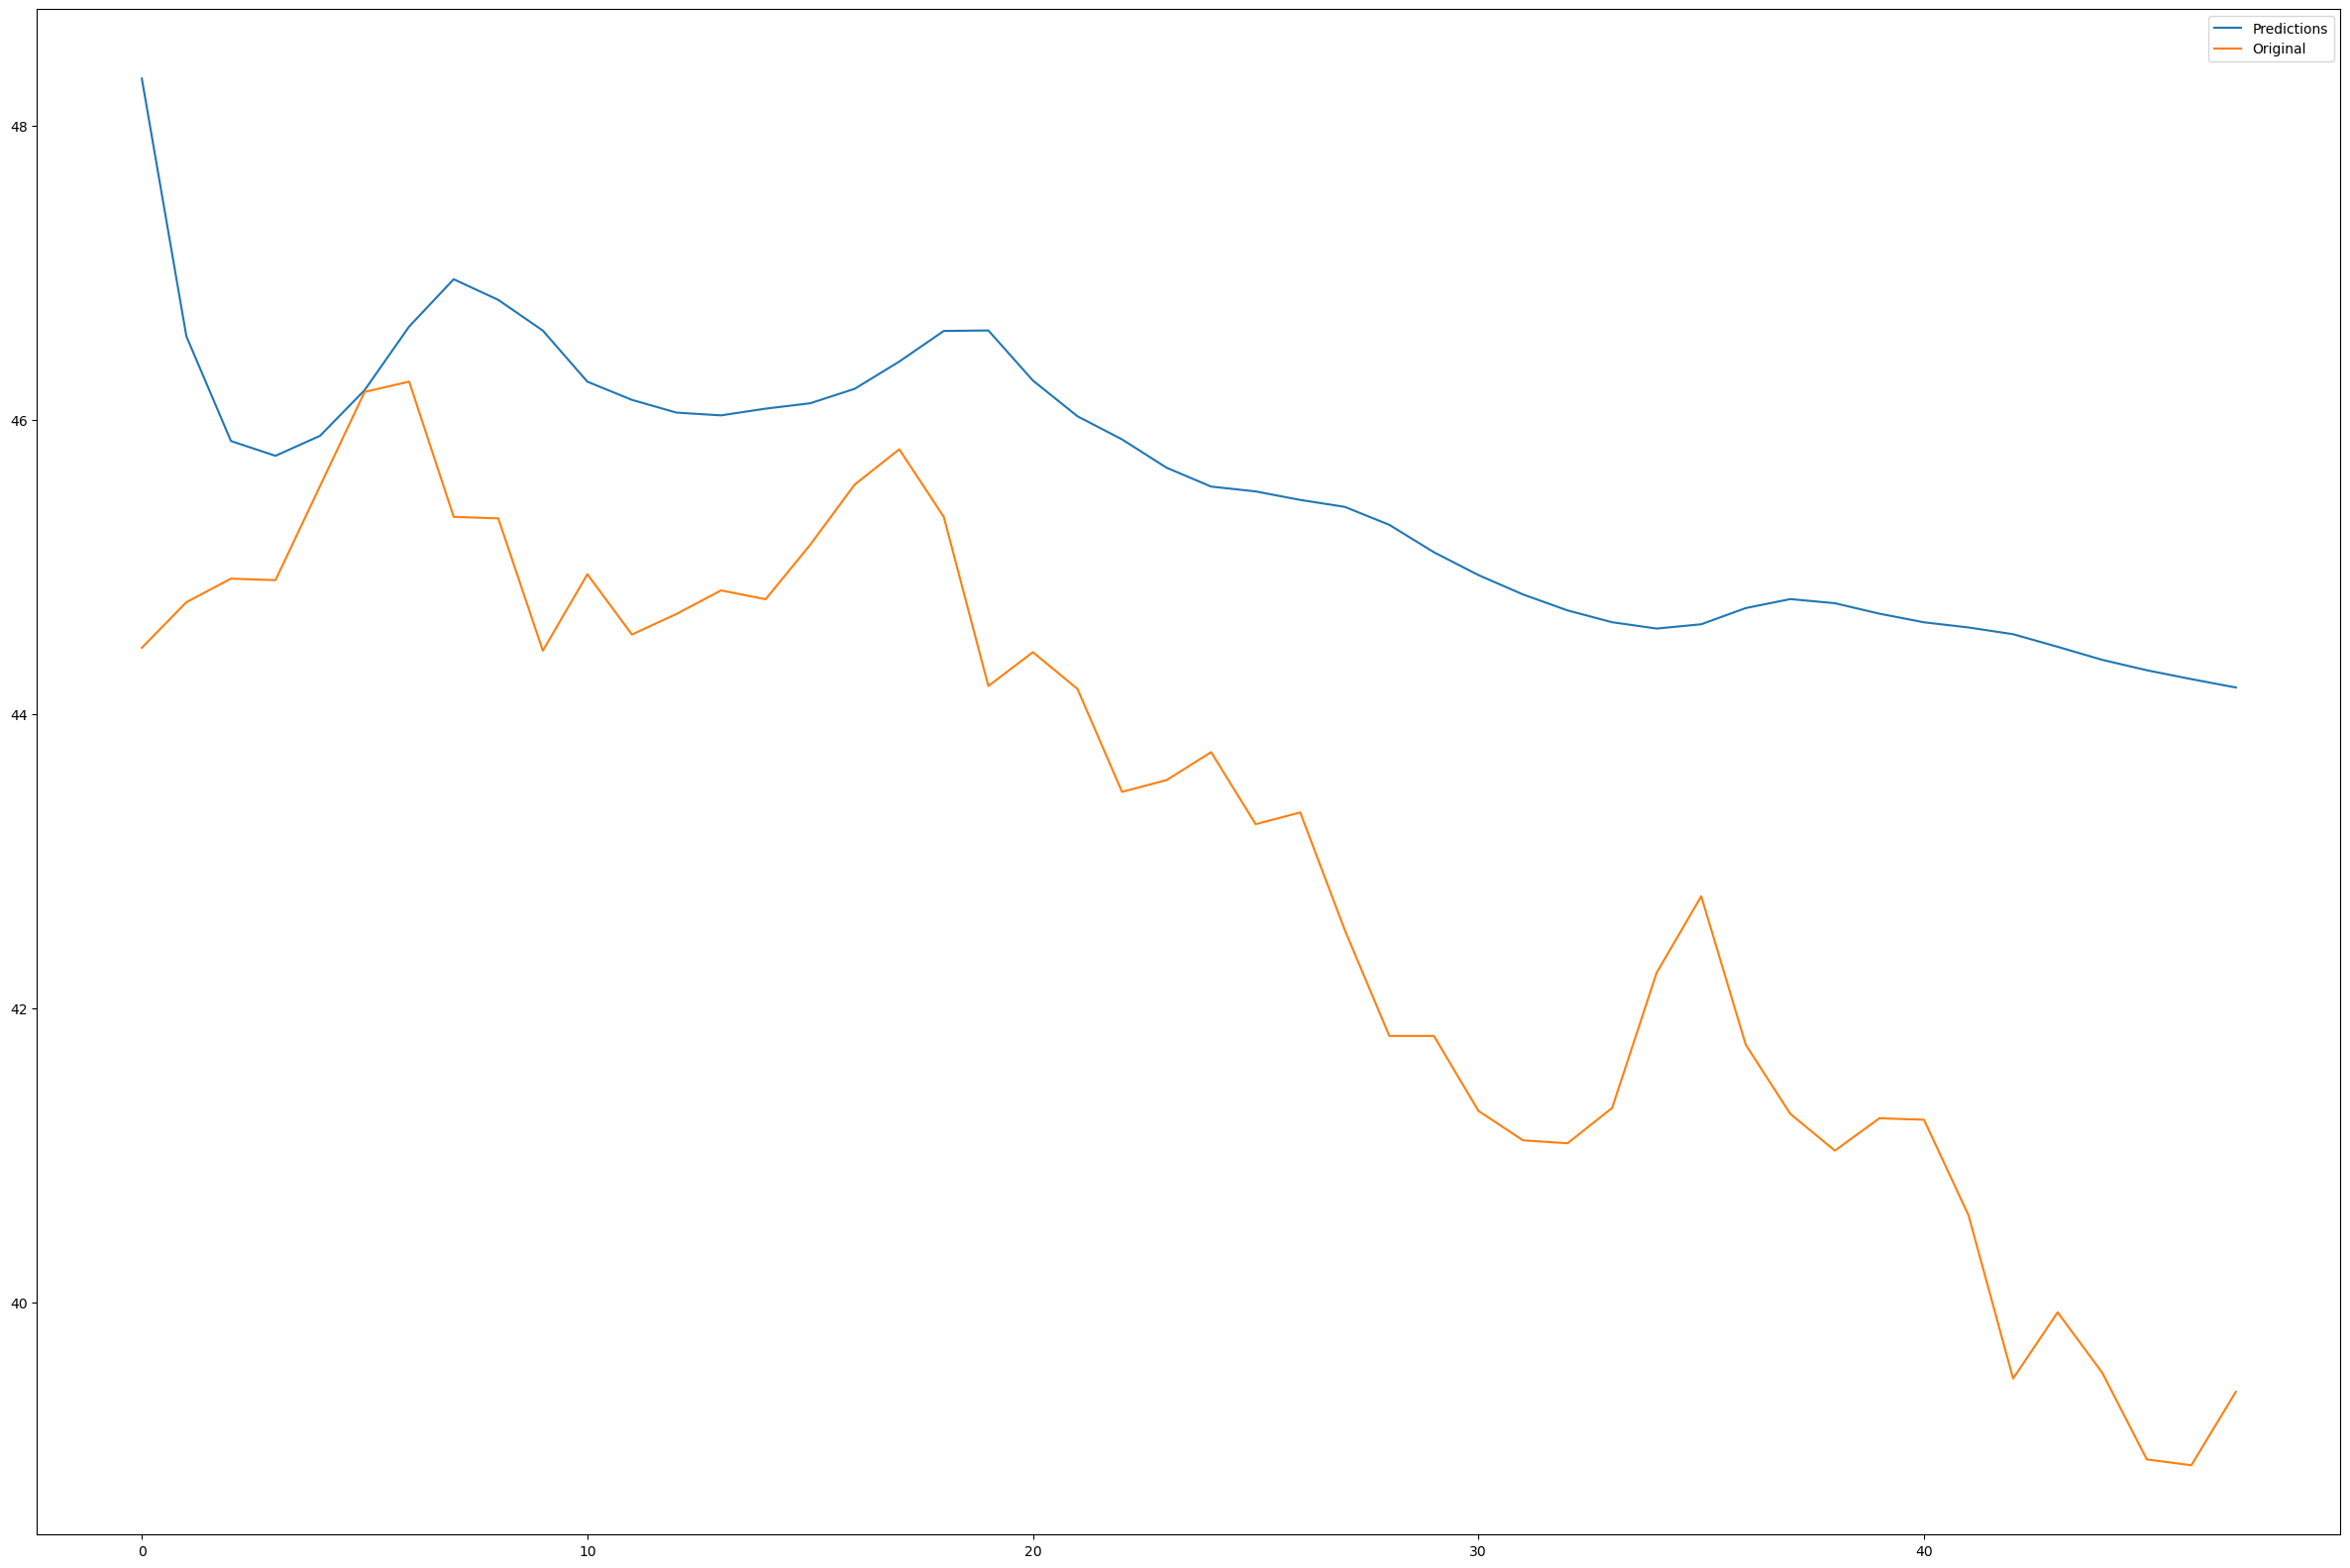

In [134]:
plt.figure(figsize=(30,20))
plt.plot(y_test_pred, label="Predictions")
plt.plot(y_test, label="Original")
plt.legend()
plt.show()